[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PyPartMC-examples/blob/main/notebooks/lognorm_ex.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC-examples/blob/main/notebooks/lognorm_ex.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC-examples.git/main?urlpath=lab/tree/notebooks/lognorm_ex.ipynb)

In [ ]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2022 University of Illinois Urbana-Champaign
# Authors: https://github.com/open-atmos/PyPartMC-examples/graphs/contributors

In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip --verbose install PyPartMC

FloatSlider(value=0.0, description='RH [%]:')

Button(description='Calculate', style=ButtonStyle())

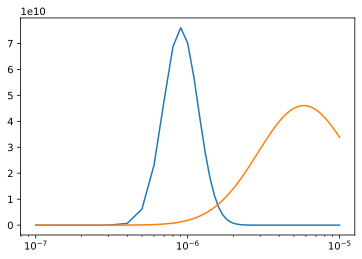

HTML(value="<a href='./spectrum.pdf' target='_blank'>./spectrum.pdf</a><br>")

In [6]:
from collections import namedtuple
import ipywidgets as widgets
import numpy as np
from matplotlib import pyplot
from IPython.display import display
from PyPartMC import si
from atmos_cloud_sim_uj_utils import show_plot

humidity_widget = widgets.FloatSlider(description='RH [%]:', min=0, max=100)
display(humidity_widget)

mode_1_n_per_cc = widgets.IntSlider(min=0, max=100000, value=50000)
h11 = widgets.HBox([widgets.Label(value='Mode 1 Number [#/cc]:'), mode_1_n_per_cc])
 
mode_1_gsd = widgets.FloatSlider(min=1.1, max=5, value=1.3)
h12 = widgets.HBox([widgets.Label(value='Mode 1 Geometric Standard Deviation:'), mode_1_gsd])
 
mode_1_gm_microns = widgets.FloatSlider(min=0.001, max=10, value=0.9, readout_format='.3f')
h13 = widgets.HBox([widgets.Label(value='Mode 1 Geometric Mean Diameter [microns]:'),
    mode_1_gm_microns])

mode_2_n_per_cc = widgets.IntSlider(min=0, max=100000, value=80000)
h21 = widgets.HBox([widgets.Label(value='Mode 2 Number [#/cc]:'), mode_2_n_per_cc])

mode_2_gsd = widgets.FloatSlider(min=1.1, max=5, value=2)
h22 = widgets.HBox([widgets.Label(value='Mode 2 Geometric Standard Deviation:'), mode_2_gsd])

mode_2_gm_microns = widgets.FloatSlider(min=0.001, max=10, value=5.8, readout_format='.3f')
h23 = widgets.HBox([widgets.Label(value='Mode 2 Geometric Mean Diameter [microns]:'),
    mode_2_gm_microns])

v1 = widgets.VBox([h11, h12, h13])
v2 = widgets.VBox([h21, h22, h23])

button = widgets.Button(description='Calculate')

def ln_norm():
    Mode = namedtuple("Mode", ("norm_factor", "geom_mean", "geom_stdev"))
    modes = (
        Mode(
            norm_factor=mode_1_n_per_cc.value/si.cm**3,
            geom_mean=mode_1_gm_microns.value*si.um,
            geom_stdev=mode_1_gsd.value
        ),
        Mode(
            norm_factor=mode_2_n_per_cc.value/si.cm**3,
            geom_mean=mode_2_gm_microns.value*si.um,
            geom_stdev=mode_2_gsd.value
        )
    )
    
    diameters = np.linspace(0.1*si.um,10*si.um, 100)

    def lognormal(diam, num, geom_mean, geom_stdev):
        return diam * (
            (num / (np.sqrt(2*np.pi)*diam*np.log(geom_stdev))) *
            np.exp(-(np.log(diam) - np.log(geom_mean))** 2 / (2*np.log(geom_stdev)** 2))
        )
    
    fig = pyplot.figure()
    
    fig.add_subplot(xscale='log')
    
    pyplot.plot(diameters, lognormal(diameters, *modes[0]))
    pyplot.plot(diameters, lognormal(diameters, *modes[1]))
    show_plot("spectrum.pdf")

def on_button_clicked(_):
    ln_norm()

V = widgets.VBox([v1, v2])
display(V)
display(button)

button.on_click(on_button_clicked)